## 1

a. We know $\sigma_c = 30 \text{ ksi}$, so we substitute that into (6.1) to find $K_C$. Note that we will need to iterate to find $r_p$ for this material.

In [12]:
import numpy as np

sc = 30.0 #ksi
a0 = 2.0 #in.
sy = 100.0 #ksi
t = 0.1 #in.

KI = sc*np.sqrt(np.pi*a0)
I = 6.7 - 1.5/t*(KI/sy)**2
#I is less than 2, so we force 2
if I < 2:
    I = 2
#This is plane stress
rp = 1.0/(I*np.pi)*(KI/sy)**2
aeff = a0+rp
KI_new = sc*np.sqrt(np.pi*aeff)
while ((KI_new-KI)/(KI))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI_new/sy)**2
    aeff = a0 + rp
    KI = KI_new
    KI_new = sc*np.sqrt(np.pi*aeff)
print KI
print KI_new

76.8722042184
76.9466496127


So we find the fracture toughness, $K_C = 76.9 \text{ ksi} \sqrt{\text{in.}}$.

b. Since we found this to be in a state of plane stress, $K_{IC}$ is unknown, a thicker sample under plane strain conditions would need to be tested to find $K_{IC}$.

c. We can use this same $K_C$ for a material with the same thickness, so we find

In [13]:
a0 = 9.0/2.0 #in
rp = 1.0/(I*np.pi)*(KI/sy)**2
aeff = a0+rp
sc = KI_new/np.sqrt(np.pi*aeff)
print sc

20.2542851322


We find that a remote stress of 20.3 ksi will fracture a specimen with a 9-in. crack.

d. This $K_C$ is only valid for 0.1-in thick plates, so we cannot determine the fracture stress in a thicker panel.

e. For a 0.1 in. center-crack we find

In [27]:
a0 = 0.1/2.0 #in
rp = 1.0/(I*np.pi)*(KI_new/sy)**2
aeff = a0+rp
sc = KI_new/np.sqrt(np.pi*aeff)
print sc

168.332834507


This stress is higher than the yield stress of the material, at which point LEFM are not valid, so we are unsure of the fracture stress (although we would predict general failure due to net yield at 100 ksi).

## 2

a. Here we look up the appropriate $K_C$ or $K_{IC}$ values from the tables given in the text. 1.5-in thick aluminum is considered thick enough to be in a state of plane strain, so we use $K_{IC} = 32 \text{ ksi}\sqrt{\text{in.}}$ and use (2.4a) for a finite width edge-crack.

In [15]:
a = 2.0 #in
W = 8.0 #in
KIC = 32.0 #ksi sqrt(in)
sy = 50.0 #ksi
t = 1.5 #in
beta = 1.122 -0.231*a/W + 10.55*(a/W)**2 -21.71*(a/W)**3 + 30.82*(a/W)**4
sc = KIC/(np.sqrt(np.pi*a)*beta)
print sc

8.48363867904


Although for this thickness we assumed a state of plane strain, which would have a negligible plastic zone size, we can check to see if this is a valid assumption.

In [16]:
I = 6.7 - 1.5/t*(KIC/sy)**2
if I > 6.0:
    I = 6
#we find that we are in plane strain, check r_p
rp = 1.0/(I*np.pi)*(KIC/sy)**2
aeff = a+rp
beta = 1.122 -0.231*aeff/W + 10.55*(aeff/W)**2 -21.71*(aeff/W)**3 + 30.82*(aeff/W)**4
sc = KIC/(np.sqrt(np.pi*aeff)*beta)
print sc

8.39375004618


We see that the plastic zone size has a very minimal effect, changing $\sigma_c$ from 8.48 ksi to 8.39 ksi. This is why it is often neglected in plane strain problems.

b. For an identical panel in the transverse direction, we have $K_{IC} = 29 \text{ ksi}\sqrt{\text{in.}}$ we change this value and use all the same equations as in part a.

In [17]:
a = 2.0 #in
W = 8.0 #in
KIC = 29.0 #ksi sqrt(in)
sy = 50.0 #ksi
t = 1.5 #in
beta = 1.122 -0.231*a/W + 10.55*(a/W)**2 -21.71*(a/W)**3 + 30.82*(a/W)**4
sc = KIC/(np.sqrt(np.pi*a)*beta)
print sc
I = 6.7 - 1.5/t*(KIC/sy)**2
if I > 6.0:
    I = 6
#we find that we are in plane strain, check r_p
rp = 1.0/(I*np.pi)*(KIC/sy)**2
aeff = a+rp
beta = 1.122 -0.231*aeff/W + 10.55*(aeff/W)**2 -21.71*(aeff/W)**3 + 30.82*(aeff/W)**4
sc = KIC/(np.sqrt(np.pi*aeff)*beta)
print sc

7.68829755288
7.62131453178


For this panel, including the small plastic zone correction, we anticipate a failure stress of $\sigma_c = 7.62$ ksi.

c. This panel is thin enough to be within the plane stress/transition regime, so we look it up on the chart on page 113, where we find $K_C = 60 \text{ ksi} \sqrt{\text{in.}}$. We use the same equations as before, with the new material properties and thickness for this panel

In [18]:
a = 2.0 #in
W = 8.0 #in
KC = 60.0 #ksi sqrt(in)
sy = 72.0 #ksi
t = 0.5 #in
beta = 1.122 -0.231*a/W + 10.55*(a/W)**2 -21.71*(a/W)**3 + 30.82*(a/W)**4
sc = KC/(np.sqrt(np.pi*a)*beta)
print sc
I = 6.7 - 1.5/t*(KC/sy)**2

#we find that we are in the transition between plane strain and plane stress, check r_p
rp = 1.0/(I*np.pi)*(KC/sy)**2
aeff = a+rp
beta = 1.122 -0.231*aeff/W + 10.55*(aeff/W)**2 -21.71*(aeff/W)**3 + 30.82*(aeff/W)**4
sc = KC/(np.sqrt(np.pi*aeff)*beta)
print sc

15.9068225232
15.5383920328


After including the plastic zone size, we find $\sigma_c = 15.5 \text{ ksi}$.

d. For the same panel at -65$^\circ$F, we find $K_C = 46 \text{ ksi} \sqrt{\text{in.}}$, all other parameters are the same

In [19]:
a = 2.0 #in
W = 8.0 #in
KC = 46.0 #ksi sqrt(in)
sy = 72.0 #ksi
t = 0.5 #in
beta = 1.122 -0.231*a/W + 10.55*(a/W)**2 -21.71*(a/W)**3 + 30.82*(a/W)**4
sc = KC/(np.sqrt(np.pi*a)*beta)
print sc
I = 6.7 - 1.5/t*(KC/sy)**2
#we find that we are in the transition between plane strain and plane stress, check r_p
rp = 1.0/(I*np.pi)*(KC/sy)**2
aeff = a+rp
beta = 1.122 -0.231*aeff/W + 10.55*(aeff/W)**2 -21.71*(aeff/W)**3 + 30.82*(aeff/W)**4
sc = KC/(np.sqrt(np.pi*aeff)*beta)
print sc

12.1952306011
12.0542145547


We find that $\sigma_c = 12.1 \text{ ksi}$

e. For this alloy of steel we find $K_C = 72 \text{ ksi}$, substituting into the equations gives

In [20]:
a = 2.0 #in
W = 8.0 #in
KC = 107.0 #ksi sqrt(in)
sy = 140.0 #ksi
t = 1.0 #in
beta = 1.122 -0.231*a/W + 10.55*(a/W)**2 -21.71*(a/W)**3 + 30.82*(a/W)**4
sc = KC/(np.sqrt(np.pi*a)*beta)
print sc
I = 6.7 - 1.5/t*(KC/sy)**2
if I > 6:
    I = 6
#we find that we are in the plane strain region, check r_p
rp = 1.0/(I*np.pi)*(KC/sy)**2
aeff = a+rp
beta = 1.122 -0.231*aeff/W + 10.55*(aeff/W)**2 -21.71*(aeff/W)**3 + 30.82*(aeff/W)**4
sc = KC/(np.sqrt(np.pi*aeff)*beta)
print sc

28.367166833
27.9269319192


Which gives $\sigma_c = 27.9 \text{ ksi}$.

## 3

In this problem we are given load-displacement data and are tasked with using that data to create an R-Curve, and use the tangent curve method to find $K_C$ for this test. We first load the data and define material properties

C:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


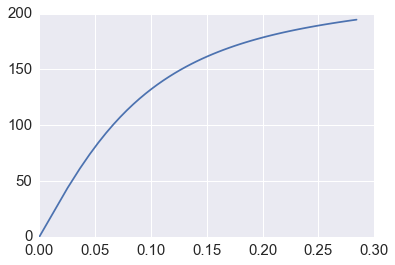

In [21]:
#load optimization and plotting libraries
from scipy.optimize import minimize
from scipy import interpolate
from matplotlib import pyplot as plt  
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline

#load fictitious test data
data = np.loadtxt('HW3-3.txt')
v = data[:,0]
P = data[:,1]
plt.plot(v,P)

#material properties (also fake)
s_ys = 48.0 #kpsi
B = 0.05 #in.
W = 50.0 #in.
E = 11000.0 #kpsi
Y = 0.75 #in.
nu = 0.33 #unitless

The load-displacement curve looks reasonable and our data has been entered, so now we can use equations (6.14)-(6.16) to calculate the effective crack length at each point.

In [22]:
#calculate dv/dp from the data
dvdp = (v[1:]-v[0])/(P[1:]-P[0])

#use 6.15 and 6.16 to get initial guess for a_eff
X = 1. - np.exp(-np.sqrt((E*B*dvdp)**2-(2*Y/W)**2)/2.141)
a_guess = W/2.*(1.2235*X-0.699032*X**2 + 3.25584*X**3 - 6.65042*X**4 + 5.54*X**5 - 1.66989*X**6)

#objective function for minimization
def myobj(x,args=(dvdp,)):
    return (E*B*args - 2*Y/W*np.sqrt(np.pi*x/W/np.sin(np.pi*x/W))*(2*W/np.pi/Y*np.arccosh(np.cosh(np.pi*Y/W)/np.cos(np.pi*x[0]/W))-(1+nu)/np.sqrt(1+(np.sin(np.pi*x/W)/np.sinh(np.pi*Y/W))**2)+nu))**2

#run minimization once for every dvdp value
a_opt = []
for i in range(len(a_guess)):
    x0 = a_guess[i] #initial value
    res = minimize(myobj,x0,method='nelder-mead',args=(dvdp[i],))
    a_opt.append(res.x[0])
    #print res.fun #check function value to make sure optimization was successful

Now that we have determined the effective crack length at each point in the test, we can also calculate $K_I$ for each test point, and plot the resulting $K_R$ curve.

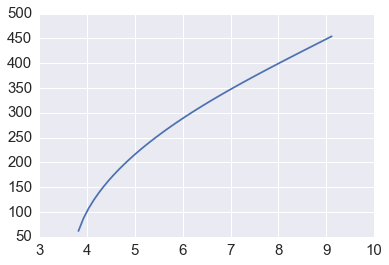

In [23]:
#KI for center crack in finite panel
def ki(a,W=W,B=B,P=100):  
    return P/(B*W)*(np.pi*a)**.5*(1./np.cos(np.pi*a/W))**.5

K_r = []
for i in range(len(a_opt)):
    K_r.append(ki(a_opt[i],W=W,B=B,P=P[i+1]))
plt.plot(a_opt,K_r)

Now we need to find $K_c$. We do this by finding the point of intersection for a constant-stress $K_I$ curve which is tangent to the $K_R$ curve at the point of intersection. First let's plot a few constant-stress $K_I$ curves to see what a good initial guess for the optimizer should be.

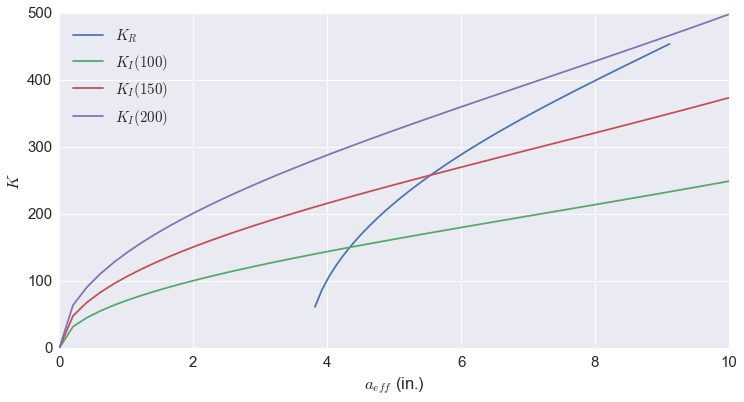

In [24]:
plt.figure(figsize=(12,6))
#r-curve plot
plt.plot(a_opt,K_r,label='$K_R$')
#constant-stress KI-curves
a = np.linspace(0,10)
plt.plot(a,[ki(i,P=100) for i in a],label='$K_I(100)$')  
plt.plot(a,[ki(i,P=150) for i in a],label='$K_I(150)$')  
plt.plot(a,[ki(i,P=200) for i in a],label='$K_I(200)$')
plt.legend(loc='best')
plt.xlabel('$a_{eff}$ (in.)')
plt.ylabel('$K$')

We see that our initial load shoul probably be around 200 k-lbs, so we use that in the optimization

In [26]:
#interpolate the kr_curve
kr_smooth = interpolate.splrep(a_opt,K_r)

#objective function for minimization
#x is array of variables to be optimized
def myobj(x):
    a_crit = x[0] #critical crack length, point of intersection
    P_crit = x[1] #critical load
    ki_smooth = interpolate.splrep(a,[ki(i,P=P_crit) for i in a])
    #squared difference of function values
    d1 = (interpolate.splev(a_crit,kr_smooth,der=0)-interpolate.splev(a_crit,ki_smooth,der=0))**2
    #squared difference of slopes (check for tangent)
    d2 = (interpolate.splev(a_crit,kr_smooth,der=1)-interpolate.splev(a_crit,ki_smooth,der=1))**2
    return d1 + d2
#initial guess
x0 = np.array([8,200])
res = minimize(myobj,x0,method='nelder-mead')
print res.x[0]
print interpolate.splev(res.x[0],kr_smooth)

9.83659754067
489.893193468


We find $a_{crit}$ is 9.84 in. with $K_C = 489.9$ ksi.